In [55]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report

In [56]:
# Importing Data

train_data = pd.read_csv("C:/Users/SATYAM KUMAR/Desktop/Codeway/movie_genre/train_data.txt", sep=':::', engine="python", names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

test_data = pd.read_csv("C:/Users/SATYAM KUMAR/Desktop/Codeway/movie_genre/test_data.txt", sep=':::', engine="python", names=['ID', 'TITLE',  'DESCRIPTION']) 

test_solution_data = pd.read_csv("C:/Users/SATYAM KUMAR/Desktop/Codeway/movie_genre/test_data_solution.txt", sep=':::', engine="python", names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

In [57]:
display(train_data.head())

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [58]:
print(display(test_data.head()))

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


None


In [59]:
print(display(test_solution_data.head()))

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


None


In [60]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


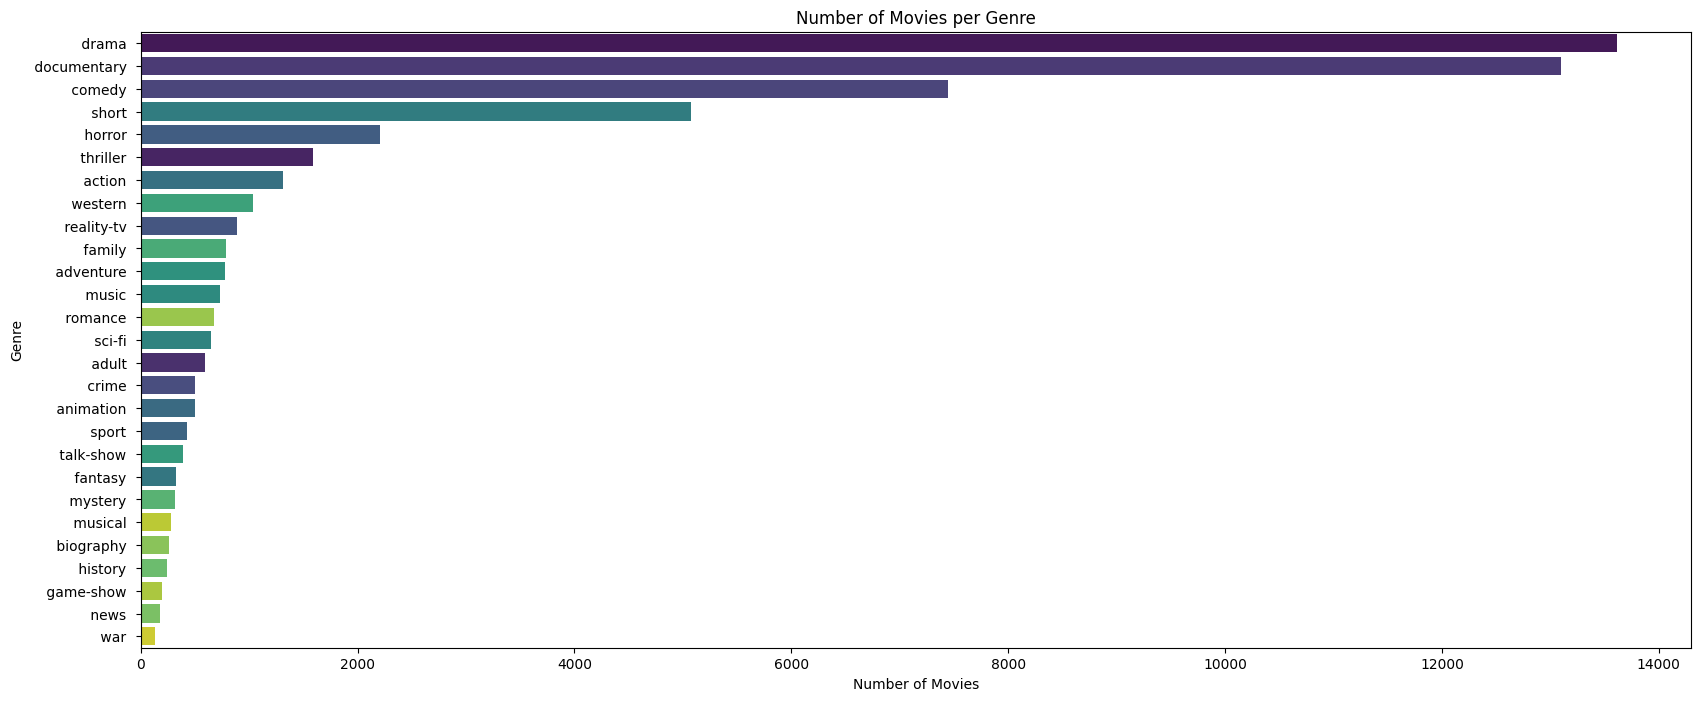

In [61]:
# Data Visualisation

plt.figure(figsize=(20,8))
sns.countplot(y=train_data['GENRE'], order = train_data['GENRE'].value_counts().index, hue = train_data['GENRE'],  palette='viridis', legend = False)
plt.title('Number of Movies per Genre') 
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

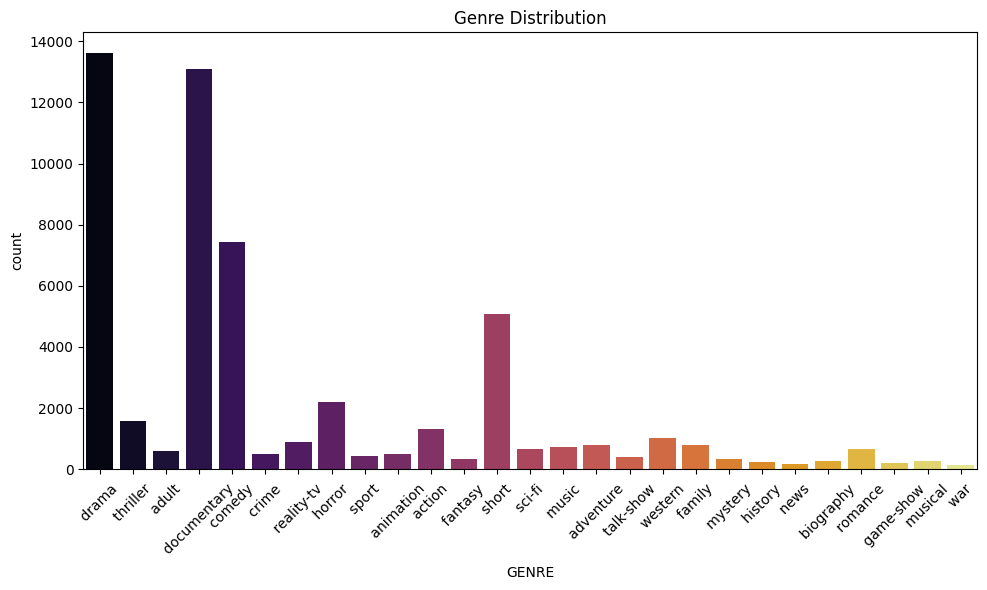

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='GENRE', hue = train_data['GENRE'],  palette='inferno')  # Correct usage: data=train_data, x='genre'
plt.xticks(rotation=45)
plt.title('Genre Distribution')
plt.tight_layout()
plt.show()

In [63]:
# Training Data

train_data['DESCRIPTION'] = train_data['DESCRIPTION'].fillna("")
test_data['DESCRIPTION'] = test_data['DESCRIPTION'].fillna("")
t_v = TfidfVectorizer(stop_words='english', max_features=100000) 
X_train = t_v.fit_transform(train_data['DESCRIPTION'])
X_test = t_v.transform(test_data['DESCRIPTION'])
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['GENRE']) 
y_test = label_encoder.transform(test_solution_data['GENRE'])

In [64]:
# Modelling

X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=32)
clf = LinearSVC()
clf.fit(X_train_sub, y_train_sub)

y_val_pred = clf.predict(X_val) 
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

y_pred = clf.predict(X_test) 
print("Test Accuracy:", accuracy_score(y_test, y_pred))

C:\Users\SATYAM KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Validation Accuracy: 0.5828645208890528
Test Accuracy: 0.5798154981549816


In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.32      0.36      1314
           1       0.64      0.38      0.48       590
           2       0.54      0.23      0.32       775
           3       0.43      0.13      0.20       498
           4       0.00      0.00      0.00       264
           5       0.54      0.58      0.56      7446
           6       0.24      0.06      0.09       505
           7       0.68      0.82      0.75     13096
           8       0.56      0.71      0.63     13612
           9       0.33      0.12      0.18       783
          10       0.28      0.07      0.11       322
          11       0.79      0.64      0.70       193
          12       0.25      0.02      0.03       243
          13       0.61      0.63      0.62      2204
          14       0.65      0.52      0.58       731
          15       0.41      0.08      0.13       276
          16       0.24      0.03      0.05       318
          17       0.63    

In [66]:
# Prediction Results

def predict_movie(description):
    t_v1 = t_v.transform([description]) 
    pred_label = clf.predict(t_v1) 
    return label_encoder.inverse_transform(pred_label)[0]

sample_descr_for_movie = "A movie where criminal murders someone" 
print("Genre: ",predict_movie(sample_descr_for_movie))

sample_descr_for_movie1 = "A movie where boy slips on a banana" 
print("Genre: ",predict_movie(sample_descr_for_movie1))

sample_descr_for_movie2 = "A movie where a boy has an accident" 
print("Genre: ",predict_movie(sample_descr_for_movie2))

sample_descr_for_movie3 = "A movie where there is a haunted house" 
print("Genre: ",predict_movie(sample_descr_for_movie3))

Genre:   crime 
Genre:   comedy 
Genre:   drama 
Genre:   horror 
